<a href="https://colab.research.google.com/github/sartajsehgal/FarmLab-Disease-Prediction/blob/main/Rice_Crop_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from PIL import Image
import random

In [3]:
path='/content/drive/MyDrive/Rice Dataset/'
categories=os.listdir(path)
training=[]
categories
for category in categories:
    class_num=categories.index(category)
    for img in os.listdir(path+category):
        if img.endswith('.jpg') or img.endswith('.JPG'):
            img_array=cv2.imread(path+category+'/'+img)
            new_array=cv2.resize(img_array,(64,64))
            training.append([new_array, class_num])
training[0]

[array([[[228, 220, 220],
         [234, 227, 225],
         [231, 223, 223],
         ...,
         [212, 204, 203],
         [218, 204, 205],
         [209, 201, 201]],
 
        [[236, 228, 226],
         [237, 223, 224],
         [238, 225, 219],
         ...,
         [209, 201, 201],
         [213, 205, 205],
         [213, 206, 203]],
 
        [[244, 230, 231],
         [239, 225, 226],
         [239, 225, 226],
         ...,
         [212, 204, 204],
         [214, 200, 201],
         [210, 196, 197]],
 
        ...,
 
        [[249, 242, 241],
         [243, 235, 234],
         [243, 235, 235],
         ...,
         [226, 212, 213],
         [223, 209, 210],
         [224, 210, 211]],
 
        [[245, 237, 237],
         [247, 239, 239],
         [246, 238, 237],
         ...,
         [226, 212, 213],
         [229, 216, 216],
         [228, 214, 215]],
 
        [[247, 239, 239],
         [244, 237, 235],
         [252, 245, 244],
         ...,
         [230, 216, 217],
  

In [4]:
random.shuffle(training)

In [5]:
X=[]
y=[]
for features, label in training:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,64,64,3)

In [6]:
X=X.astype('float32')
X/=255
from keras.utils import np_utils
Y=np_utils.to_categorical(y,7)
print(Y[100])
print(Y.shape)

[0. 0. 1. 0. 0. 0. 0.]
(9237, 7)


In [7]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size = 0.2, random_state = 42)

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3),kernel_regularizer=keras.regularizers.l2(0.05)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.05)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 128)      

In [20]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_ds=tf.data.Dataset.from_tensor_slices((X_valid,y_valid))
test_ds=tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [22]:
history=model.fit(train_ds.batch(128),
         epochs=60,
         validation_data=valid_ds.batch(128))

Epoch 1/60
47/47 [==============================] - 3s 58ms/step - loss: 5.5841 - accuracy: 0.2678 - val_loss: 2.8981 - val_accuracy: 0.4296
Epoch 2/60
47/47 [==============================] - 3s 56ms/step - loss: 2.2814 - accuracy: 0.4859 - val_loss: 1.7236 - val_accuracy: 0.5501
Epoch 3/60
47/47 [==============================] - 3s 55ms/step - loss: 1.5390 - accuracy: 0.5772 - val_loss: 1.3246 - val_accuracy: 0.6137
Epoch 4/60
47/47 [==============================] - 3s 54ms/step - loss: 1.2928 - accuracy: 0.5945 - val_loss: 1.1789 - val_accuracy: 0.6367
Epoch 5/60
47/47 [==============================] - 3s 54ms/step - loss: 1.1812 - accuracy: 0.6087 - val_loss: 1.0827 - val_accuracy: 0.6401
Epoch 6/60
47/47 [==============================] - 3s 55ms/step - loss: 1.1132 - accuracy: 0.6205 - val_loss: 1.0496 - val_accuracy: 0.6556
Epoch 7/60
47/47 [==============================] - 3s 54ms/step - loss: 1.0660 - accuracy: 0.6349 - val_loss: 1.0112 - val_accuracy: 0.6455
Epoch 8/60
47

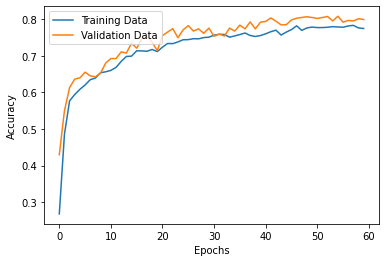

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Data')
plt.plot(history.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [30]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [31]:
model.evaluate(X_test,y_test)

58/58 [==============================] - 1s 9ms/step - loss: 0.6521 - accuracy: 0.7689


[0.6520943641662598, 0.7689393758773804]

In [24]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [25]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 128)      

In [26]:
model1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
history1=model1.fit(train_ds.batch(128),
         epochs=60,
         validation_data=valid_ds.batch(128))

Epoch 1/60
47/47 [==============================] - 3s 58ms/step - loss: 2.1565 - accuracy: 0.2022 - val_loss: 1.8674 - val_accuracy: 0.3261
Epoch 2/60
47/47 [==============================] - 3s 55ms/step - loss: 1.6551 - accuracy: 0.3350 - val_loss: 1.3152 - val_accuracy: 0.4452
Epoch 3/60
47/47 [==============================] - 3s 55ms/step - loss: 1.2199 - accuracy: 0.4762 - val_loss: 1.0753 - val_accuracy: 0.5440
Epoch 4/60
47/47 [==============================] - 3s 55ms/step - loss: 1.0976 - accuracy: 0.5365 - val_loss: 1.0184 - val_accuracy: 0.5785
Epoch 5/60
47/47 [==============================] - 3s 55ms/step - loss: 1.0064 - accuracy: 0.5889 - val_loss: 0.9066 - val_accuracy: 0.6387
Epoch 6/60
47/47 [==============================] - 3s 54ms/step - loss: 0.9320 - accuracy: 0.6266 - val_loss: 0.8332 - val_accuracy: 0.6773
Epoch 7/60
47/47 [==============================] - 3s 55ms/step - loss: 0.8367 - accuracy: 0.6664 - val_loss: 0.7316 - val_accuracy: 0.7503
Epoch 8/60
47

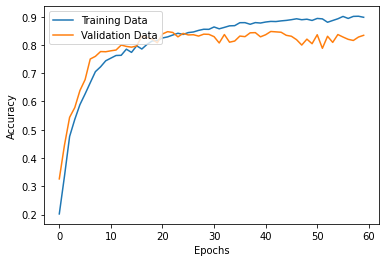

In [28]:
plt.plot(history1.history['accuracy'],label='Training Data')
plt.plot(history1.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [32]:
model1.evaluate(X_test,y_test)

58/58 [==============================] - 1s 8ms/step - loss: 0.5997 - accuracy: 0.8057


[0.5997431874275208, 0.8057359457015991]

In [47]:
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [48]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 128)      

In [49]:
model2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
history2=model1.fit(train_ds.batch(128),
         epochs=60,
         validation_data=valid_ds.batch(128))

Epoch 1/60
47/47 [==============================] - 3s 55ms/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 1.0317 - val_accuracy: 0.8295
Epoch 2/60
47/47 [==============================] - 3s 54ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 1.0984 - val_accuracy: 0.8322
Epoch 3/60
47/47 [==============================] - 3s 55ms/step - loss: 0.0311 - accuracy: 0.9887 - val_loss: 1.1398 - val_accuracy: 0.8268
Epoch 4/60
47/47 [==============================] - 3s 55ms/step - loss: 0.0361 - accuracy: 0.9871 - val_loss: 1.0935 - val_accuracy: 0.8288
Epoch 5/60
47/47 [==============================] - 3s 56ms/step - loss: 0.0377 - accuracy: 0.9865 - val_loss: 1.1709 - val_accuracy: 0.8166
Epoch 6/60
47/47 [==============================] - 3s 56ms/step - loss: 0.0424 - accuracy: 0.9849 - val_loss: 1.1189 - val_accuracy: 0.8261
Epoch 7/60
47/47 [==============================] - 3s 55ms/step - loss: 0.0291 - accuracy: 0.9897 - val_loss: 1.0169 - val_accuracy: 0.8295
Epoch 8/60
47

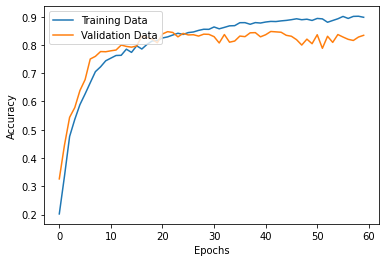

In [52]:
plt.plot(history1.history['accuracy'],label='Training Data')
plt.plot(history1.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()